<a href="https://colab.research.google.com/github/DangTrungNhut/Artificial_Intelligence_Course/blob/main/GK_Vietnamese_dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

#Kết nối với drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Giai nen tập dữ liệu rar
!apt-get install -y unrar

rar_file_path = "/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/Dishes/archive (1).rar" 
extract_path = "/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/Dishes" 
!unrar x '{rar_file_path}' '{extract_path}'

In [14]:
# Khai báo các thông số cho việc train mô hình
batch_size = 64
epochs = 30
num_classes = 10
input_shape = (150, 150, 3)

In [4]:
# Chuẩn bị dữ liệu huấn luyện và xác thực
train_data = '/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/Dishes/archive (1)/Images/Train'
valid_data = '/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/Dishes/archive (1)/Images/Test'

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [6]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_dataset = train_datagen.flow_from_directory(train_data, target_size=input_shape[:2], batch_size=batch_size, class_mode='categorical')

Found 1595 images belonging to 10 classes.


In [8]:
validation_dataset = validation_datagen.flow_from_directory(valid_data, target_size=input_shape[:2], batch_size=batch_size, class_mode='categorical')

Found 947 images belonging to 10 classes.


In [9]:
train_dataset.class_indices

{'Banh beo': 0,
 'Banh chung': 1,
 'Banh cuon': 2,
 'Banh duc': 3,
 'Banh mi': 4,
 'Banh pia': 5,
 'Banh trang nuong': 6,
 'Banh xeo': 7,
 'Bun bo Hue': 8,
 'Bun dau mam tom': 9}

In [16]:
# Xây dựng mô hình CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')])

In [17]:
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [18]:
history = model.fit(train_dataset,epochs=epochs, validation_data=validation_dataset)

Epoch 1/30
25/25 [==============================] - 1352s 56s/step - loss: 2.3029 - accuracy: 0.1555 - val_loss: 2.1807 - val_accuracy: 0.1774
Epoch 2/30
25/25 [==============================] - 48s 2s/step - loss: 1.8451 - accuracy: 0.3630 - val_loss: 1.8459 - val_accuracy: 0.3759
Epoch 3/30
25/25 [==============================] - 49s 2s/step - loss: 1.6601 - accuracy: 0.4245 - val_loss: 1.8442 - val_accuracy: 0.3738
Epoch 4/30
25/25 [==============================] - 48s 2s/step - loss: 1.4571 - accuracy: 0.5223 - val_loss: 1.7829 - val_accuracy: 0.4446
Epoch 5/30
25/25 [==============================] - 49s 2s/step - loss: 1.3355 - accuracy: 0.5461 - val_loss: 1.6240 - val_accuracy: 0.4868
Epoch 6/30
25/25 [==============================] - 48s 2s/step - loss: 1.1631 - accuracy: 0.6132 - val_loss: 1.6125 - val_accuracy: 0.5016
Epoch 7/30
25/25 [==============================] - 49s 2s/step - loss: 1.0943 - accuracy: 0.6370 - val_loss: 1.6370 - val_accuracy: 0.4952
Epoch 8/30
25/25 

In [20]:
# Save model
model.save('/content/drive/MyDrive/AI_COURSE/Bai Tap /Report/Vietnamesedishes.h5')

In [21]:
from keras.models import load_model
classificationDishes_model = load_model('/content/drive/MyDrive/AI_COURSE/Bai Tap /Report/Vietnamesedishes.h5')

In [22]:

score=classificationDishes_model.evaluate(validation_dataset, verbose=0)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

Test loss =  3.0664546489715576
Test accuracy =  0.5385427474975586


1/1 [==============================] - 0s 209ms/step
Predict is:  Banh beo


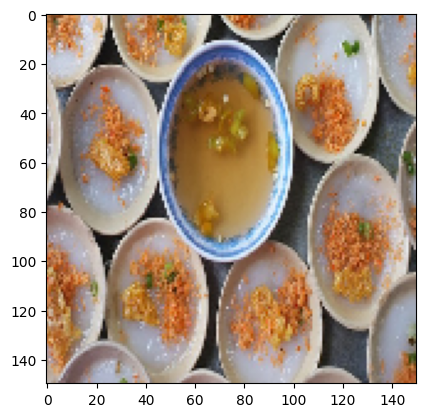

In [25]:
img = load_img('/content/drive/MyDrive/AI_COURSE/Bai Tap /Data/Dishes/archive (1)/Images/Test/Banh beo/88.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banh beo','Banh mi','Banh tet', 'Banh xeo', 'Bun bo','Ca kho to', 'Com tam','Goi cuon', 'Hu tieu','Xoi xeo']
print('Predict is: ',Label[int(np.argmax(classificationDishes_model.predict(img),axis=-1))])